<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/3DV_cv04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanishing Poitns and Intro to Computer Assisted Algebra

In this lab we will work on some problems related to vanishing points. To do so we will use the computer algebra library SymPy. It will perform symbolic manipulations of various expressions for use so we do not have to manually derive them.

## Introduction to SymPy

We will use the library [SymPy](https://docs.sympy.org/latest/index.html) (not to be confused with SimPy which is for simulations).

In [ ]:
import sympy as sp
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display

### Symbols and Expressions

SymPy operates on symbols. We can introduce them as variables and compose them into expressions. We can then print them out or use the IPython display to use mathematical notation.

In [ ]:
a = sp.Symbol('a')
x, y, z = sp.symbols('x, y, z')
theta, omega_2 = sp.symbols('theta, omega_2')

expr = a * x + y ** z + 3 + sp.cos(omega_2 * theta)

print(expr)
display(expr)

a*x + y**z + cos(omega_2*theta) + 3


a*x + y**z + cos(omega_2*theta) + 3

We can substitute expressions.

In [ ]:
expr_sub = expr.subs(x, y * sp.sin(theta))
display(expr)
display(expr_sub)

expr_trig = sp.sin(2*x) + sp.cos(2*x)
expr_trig_sub = expr_trig.subs(sp.sin(2*x), 2 * sp.sin(x) * sp.cos(x))
display(expr_trig)
display(expr_trig_sub)

a*x + y**z + cos(omega_2*theta) + 3

a*y*sin(theta) + y**z + cos(omega_2*theta) + 3

sin(2*x) + cos(2*x)

2*sin(x)*cos(x) + cos(2*x)

We can also convert expressions directly from strings.

In [ ]:
str_expr = "x**2 + 3*x - 1/2"
expr = sp.sympify(str_expr)
display(expr)

x**2 + 3*x - 1/2

### Evaluating Expressions

We can evaluate expressions using evalf. This may not be optimal choice if we want to perform evaluations often.

In [ ]:
print(expr_trig.evalf(subs={x: 0.5}))

1.38177329067604


It is usually better to use the option to lambdify an expression. This will return a callable. We can even convert the expression into numpy operations.

In [ ]:
trig_lam = sp.lambdify(x, expr_trig)

print(trig_lam(0.5))
print(trig_lam(457))

trig_np = sp.lambdify(x, expr_trig, "numpy")
print(trig_lam(0.5))
print(trig_lam(np.array([457, 0.1, 0.5, 54, 15.6])))

1.3817732906760363
-0.7773115588480247
1.3817732906760363
[-0.77731156  1.17873591  1.38177329  1.3023281   0.76252576]


We can also use multiple input arguments, but we have to remmember the order of the input variables.

Note that it is also possible to generate Cython or other code from SymPy expressions. This could be useful if you need to use the function more often. Check out [SymPy codegen](https://docs.sympy.org/latest/modules/utilities/codegen.html).

In [ ]:
expr = x ** 2 / y
expr_lam = sp.lambdify([x, y], expr)
print(expr_lam(4, 2))

expr_np = sp.lambdify([x, y], "numpy")
print(expr_lam(np.array([4, 2.5]), np.array([2, -1])))

8.0
[ 8.   -6.25]


### Simplification

One of the most useful features of a symbolic manipulation system is the ability to simplify mathematical expressions. SymPy has dozens of functions to perform various kinds of simplification. There is also one general function called `simplify()` that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression. We will only cover this and some polynomial simplifications, but you can check out the [simplification tutorial](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html) for more.

In [ ]:
display(sp.sin(x)**2 + sp.cos(x)**2)
display(sp.simplify(sp.sin(x)**2 + sp.cos(x)**2))
display((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))
display(sp.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))

sin(x)**2 + cos(x)**2

1

(x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)

x - 1

`expand()` is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions. For example:

In [ ]:
display((x + 1)**2)
display(sp.expand((x + 1)**2))
display((x + 2)*(x - 3))
display(sp.expand((x + 2)*(x - 3)))
display((x + 1)*(x - 2) - (x - 1)*x)
display(sp.expand((x + 1)*(x - 2) - (x - 1)*x))

(x + 1)**2

x**2 + 2*x + 1

(x - 3)*(x + 2)

x**2 - x - 6

-x*(x - 1) + (x - 2)*(x + 1)

-2

`factor()` takes a polynomial and factors it into irreducible factors over the rational numbers.

In [ ]:
display(sp.factor(x**3 - x**2 + x - 1))
display(sp.factor(x**2*z + 4*x*y*z + 4*y**2*z))

(x - 1)*(x**2 + 1)

z*(x + 2*y)**2

`collect()` collects common powers of a term in an expression. For example

In [ ]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr)
collected_expr = sp.collect(expr, x)
display(collected_expr)

x**3 - x**2*z + 2*x**2 + x*y + x - 3

x**3 + x**2*(2 - z) + x*(y + 1) - 3

### Solvers

We can use SymPy to solve various equations or their systems. We can define equations using the `Eq` class. We can also forego the use of equations and instead use expressions which are assumed to be equal to 0.

We can then solve equations using `solve()`. As per documentation `solveset()` is recommended as it can output infinite solutions to problems, but `solve()` is usually easier to work with. If you want to know more you can check out [the relevant tutorial](https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html) in the documentation.

In [ ]:
display(sp.solve(x**2 - x, x))

sols = sp.solve(sp.sin(x ** 2) -1, x)
display(sols[0])
display(sols[1])

[0, 1]

-sqrt(2)*sqrt(pi)/2

sqrt(2)*sqrt(pi)/2

We can also add some assumptions about the variables. This can be done using the solveset functionality, but we can also do this by restricting the variables.

In [ ]:
theta = sp.symbols('theta', positive=True)
w = sp.symbols('w', real=True, positive=True)

sols = sp.solve(sp.sin(theta ** 2) -1, theta)
print(sols)
display(sols[0])


sols = sp.solve((w ** 2 + 1) * (w - 10), w)
print(sols)
display(sols[0])

[sqrt(2)*sqrt(pi)/2]


sqrt(2)*sqrt(pi)/2

[10]


10

More importantly we can also use other symbols in the expressions.

In [ ]:
a, b, c = sp.symbols('a, b, c')
expr = a * x ** 2 + b * x + c + y
sols = sp.solve(expr, x)
display(sols[0])
display(sols[1])

(-b + sqrt(-4*a*c - 4*a*y + b**2))/(2*a)

-(b + sqrt(-4*a*c - 4*a*y + b**2))/(2*a)

We can also have multiple equations and solve a system.

In [ ]:
expr_1 = a * x + b * y - c
expr_2 = w * y - theta

sols = sp.solve([expr_1, expr_2], (x, y))
print(sols)

display(sols[x])
display(sols[y])

{x: (-b*theta + c*w)/(a*w), y: theta/w}


(-b*theta + c*w)/(a*w)

theta/w

### Matrices

We can also easily work with matrices. We can create matrices using the `Matrix` class. We can also create some base matrices such as eye, zeros, ones etc. We can also use it to represent vectors as $n \times 1$ matrices.

**Note:** If you want to look for documentation regarding vectors just look for matrices or linear algebra. SymPy has vectors, but they are not suitable for our course!

In [ ]:
A = sp.Matrix([[a, b], [c, c ** 2]])
display(A)
display(sp.eye(3))
display(sp.zeros(2, 8))
display(sp.Matrix([[a], [b], [c]]))
display(sp.Matrix([a, b, c]))

Matrix([
[a,    b],
[c, c**2]])

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0]])

Matrix([
[a],
[b],
[c]])

Matrix([
[a],
[b],
[c]])

We can also created matrices with variable names generated automatically.

**Note:** I recommend just declaring symbols and using a matrix manually. That gives you better control over the matrix.

In [ ]:
C = sp.Matrix(sp.MatrixSymbol('C', 3, 3))

display(C)
display(C[0, 0])


Matrix([
[C[0, 0], C[0, 1], C[0, 2]],
[C[1, 0], C[1, 1], C[1, 2]],
[C[2, 0], C[2, 1], C[2, 2]]])

C[0, 0]

We can work with the standard Matrix objects, but for some algorithms it is necessary for them to be immutable. We can enforce this by using the `ImmutableDenseMatrix` class. We can simply use an existing matrix in constructor or create a new matrix using a nested list. You usually only need to do this when you get an error.

In [ ]:
A = sp.ImmutableDenseMatrix(A)
B = sp.ImmutableDenseMatrix([[x**2, x, 1], [y**2, y, 1]])

display(A)
display(B)

Matrix([
[a,    b],
[c, c**2]])

Matrix([
[x**2, x, 1],
[y**2, y, 1]])

We can multiply these matrices, transpose them or compute their inverse or determinant. It is also possible to solve linear systems find eigenvectors etc, to find out more consult the documentation.

**Note:** SymPy uses `*` for matrix multiplication instead of @!

In [ ]:
display(A.T)
display(A.inv())
display(A * B)

Matrix([
[a,    c],
[b, c**2]])

Matrix([
[ c/(a*c - b), -b/(a*c**2 - b*c)],
[-1/(a*c - b),  a/(a*c**2 - b*c)]])

Matrix([
[   a*x**2 + b*y**2,    a*x + b*y,    a + b],
[c**2*y**2 + c*x**2, c**2*y + c*x, c**2 + c]])

We can also use solve for matrix equations.

In [ ]:
u = sp.Matrix([[1.5], [2], [3]])
v = sp.Matrix([2, 4])

display(u)
display(v)
expr = B * u - v
display(expr)

sols = sp.solve(expr, (x, y))
print(sols)

Matrix([
[1.5],
[  2],
[  3]])

Matrix([
[2],
[4]])

Matrix([
[1.5*x**2 + 2*x + 1],
[1.5*y**2 + 2*y - 1]])

[(-0.666666666666667 - 0.471404520791032*I, -1.72075922005613), (-0.666666666666667 - 0.471404520791032*I, 0.387425886722793), (-0.666666666666667 + 0.471404520791032*I, -1.72075922005613), (-0.666666666666667 + 0.471404520791032*I, 0.387425886722793)]


## Exercises

### Exercise 1 - Calculating the Focal Length

Consider that we have used the algorithm from the lectures to obtain a pair of vanishing points for a given camera. We get the data as python dict. Your objective is to use the equations from the lecture to find how to calculate the focal length from the two orthogonal vanishing points. In the end you should create a function which takes as input the two vanishing points and the principal point.

Do not forget that you can assume that the focal length is real and positive. Same goes for the principal components. The dict is given in the code block below. We can also assume that skew is zero and $f_x = f_y$.

The data is given for the following image:
![alt text](https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/BCS_session4_left.png)


In [ ]:
calib_data = {"pp": [960.5, 540.5], "vp1": [-238.837, -380.905], "vp2": [8211.73, -340.283]}

Note that you are free to just perform some base manipulation in SymPy and then use the output of that work via copy-pasting if you prefer.

In [ ]:
# implement the get_focal function derived using SymPy

Matrix([[u_x], [u_y], [1]])
Matrix([[v_x], [v_y], [1]])


sqrt(-p_x**2 + p_x*u_x + p_x*v_x - p_y**2 + p_y*u_y + p_y*v_y - u_x*v_x - u_y*v_y)

In [ ]:
print(get_focal(calib_data['vp1'], calib_data['vp2'], calib_data['pp']))

2808.0439053538676


## Exercise 2

Now that we know the focal length we can construct the intrinsic matrix $K$. We can also get the directions that correspond to the vanishing points. We now want to find a homography such that we rotate the view to see the road in birdseye view. To achieve this we already have the matrix $K$. We could use $K=K'$ to display the view, but that would generate a very large image and its centre would not be in the middle of the image. To keep things simple I precalculated $K'$ for you but you can also try to figure out how to determine which $K'$ to use or how to compose multiple homographies to get the warped image into the view.

$$K' = \begin{pmatrix} \frac{f}{25} & 0 & 500 \\ 0 & \frac{f}{25} & 1000 \\ 0 & 0 & 1 \end{pmatrix}$$


Since we have $K$ and $K'$ we only need to find the rotation $R$ such that:

$$ R \textbf{n}_x = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},$$
$$ R \textbf{n}_y = \begin{pmatrix} -1 \\ 0 \\ 0 \end{pmatrix},$$
$$ R \textbf{n}_z = \begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix},$$

where $\textbf{n}_x$ is the unit vector corresponding to vp1 from the dict, $\textbf{n}_y$ corresponds to vp2 and $\textbf{n}_z$ corresponds to the direction perpendicular to $\textbf{n}_x$ and $\textbf{n}_y$ (you can use vector product - `np.cross` to find it).

Use sympy to create a function which calculates the rotation matrix $R$ and then use it to warp the perspective of the image. You can use SymPy to get the homography matrix, but it is up to you.

You will use the image loaded below.


--2023-03-06 20:13:19--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/BCS_session4_left.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991478 (1.9M) [image/png]
Saving to: ‘BCS_session4_left.png.3’

BCS_session4_left.p 100%[===================>]   1.90M  --.-KB/s    in 0.07s   

2023-03-06 20:13:20 (27.2 MB/s) - ‘BCS_session4_left.png.3’ saved [1991478/1991478]



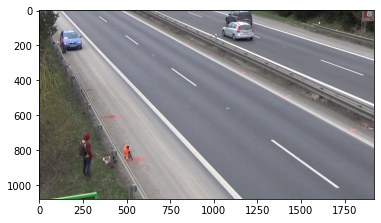

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/BCS_session4_left.png
img = cv2.imread('BCS_session4_left.png')
plt.imshow(img[:, :, ::-1])
plt.show()

In [ ]:
...

{R[0, 0]: n_x[1, 0]*n_z[2, 0]/(n_x[0, 0]*n_y[1, 0]*n_z[2, 0] - n_x[0, 0]*n_y[2, 0]*n_z[1, 0] - n_x[1, 0]*n_y[0, 0]*n_z[2, 0] + n_x[1, 0]*n_y[2, 0]*n_z[0, 0] + n_x[2, 0]*n_y[0, 0]*n_z[1, 0] - n_x[2, 0]*n_y[1, 0]*n_z[0, 0]) - n_x[2, 0]*n_z[1, 0]/(n_x[0, 0]*n_y[1, 0]*n_z[2, 0] - n_x[0, 0]*n_y[2, 0]*n_z[1, 0] - n_x[1, 0]*n_y[0, 0]*n_z[2, 0] + n_x[1, 0]*n_y[2, 0]*n_z[0, 0] + n_x[2, 0]*n_y[0, 0]*n_z[1, 0] - n_x[2, 0]*n_y[1, 0]*n_z[0, 0]), R[0, 1]: -n_x[0, 0]*n_z[2, 0]/(n_x[0, 0]*n_y[1, 0]*n_z[2, 0] - n_x[0, 0]*n_y[2, 0]*n_z[1, 0] - n_x[1, 0]*n_y[0, 0]*n_z[2, 0] + n_x[1, 0]*n_y[2, 0]*n_z[0, 0] + n_x[2, 0]*n_y[0, 0]*n_z[1, 0] - n_x[2, 0]*n_y[1, 0]*n_z[0, 0]) + n_x[2, 0]*n_z[0, 0]/(n_x[0, 0]*n_y[1, 0]*n_z[2, 0] - n_x[0, 0]*n_y[2, 0]*n_z[1, 0] - n_x[1, 0]*n_y[0, 0]*n_z[2, 0] + n_x[1, 0]*n_y[2, 0]*n_z[0, 0] + n_x[2, 0]*n_y[0, 0]*n_z[1, 0] - n_x[2, 0]*n_y[1, 0]*n_z[0, 0]), R[0, 2]: n_x[0, 0]*n_z[1, 0]/(n_x[0, 0]*n_y[1, 0]*n_z[2, 0] - n_x[0, 0]*n_y[2, 0]*n_z[1, 0] - n_x[1, 0]*n_y[0, 0]*n_z[2, 0] + 

[-195.30837811 -211.11886498   -0.31000918]


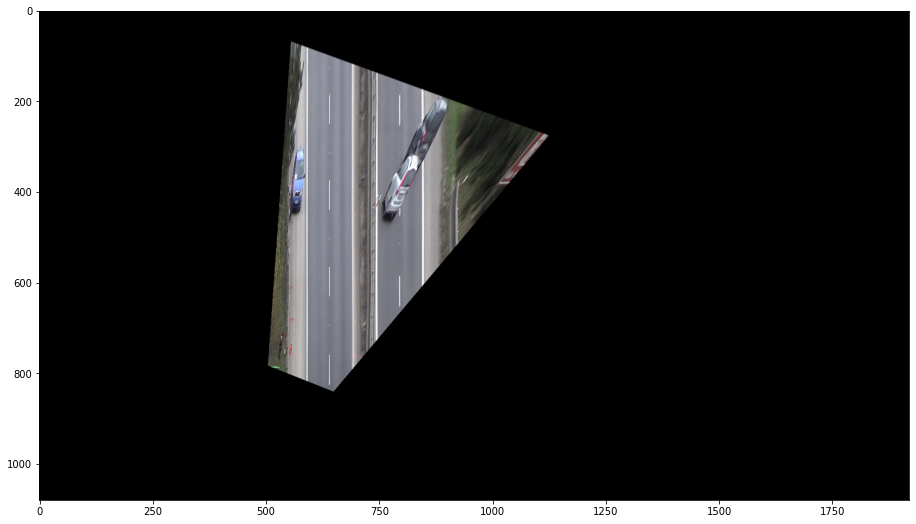

In [ ]:
...